# Essintial liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

## Data for Empirical and ML model

In [2]:
actual = np.array([112.95, 144.20, 153.36, 348.51, 58.00, 339.00, 180.90, 324.00, 31.404, 133.50])
ml_predicted = np.array([97.35, 129.76, 186.61, 311.86, 68.98, 295.293, 184.31, 303.099, 28.26, 141.547])
aci_predicted = np.array([78.83, 129.07, 162.47, 264.62, 62.68, 252.31, 108.01, 367.89, 24.56, 190.78])
eurocode_predicted = np.array([71.17, 111.59, 117.22, 219.84, 51.22, 202.74, 90.98, 319.47, 22.33, 177.26])
sharma_1986_predicted = np.array([63.43, 86.61, 174.00, 212.36, 56.50, 220.34, 85.26, 241.37, 22.63, 106.83])
ashour_predicted = np.array([81.8, 109.12, 183.29, 296.09, 85.84, 292.7, 177.51, 598.45, 20.52, 316.43])

## Compute Errors

In [3]:
def compute_errors(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return rmse, mae, r2

ml_errors = compute_errors(actual, ml_predicted)
aci_errors = compute_errors(actual, aci_predicted)
eurocode_errors = compute_errors(actual, eurocode_predicted)
sharma_errors = compute_errors(actual, sharma_1986_predicted)
ashour_errors = compute_errors(actual, ashour_predicted)


## Parity Plot (Predicted vs. Actual)

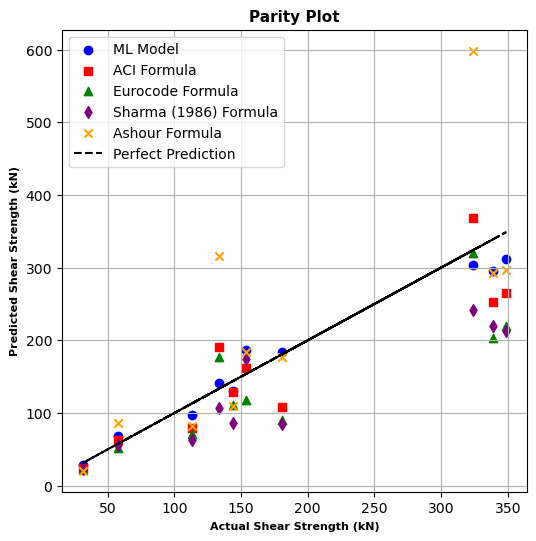

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(actual, ml_predicted, label="ML Model", marker='o', color='b')
plt.scatter(actual, aci_predicted, label="ACI Formula", marker='s', color='r')
plt.scatter(actual, eurocode_predicted, label="Eurocode Formula", marker='^', color='g')
plt.scatter(actual, sharma_1986_predicted, label="Sharma (1986) Formula", marker='d', color='purple')
plt.scatter(actual, ashour_predicted, label="Ashour Formula", marker='x', color='orange')
plt.plot(actual, actual, 'k--', label="Perfect Prediction")
plt.xlabel("Actual Shear Strength (kN)", fontsize=8, fontweight="bold")
plt.ylabel("Predicted Shear Strength (kN)", fontsize=8, fontweight="bold")
plt.legend()
plt.title("Parity Plot", fontsize=11, fontweight="bold")
plt.grid(True)
plt.show()

## Error Distribution Plot 

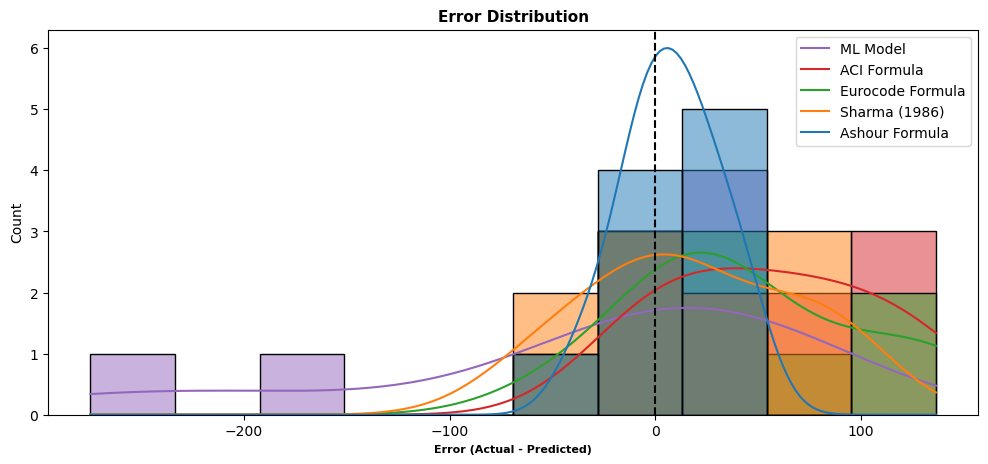

In [7]:
errors = {
    "ML Model": actual - ml_predicted,
    "ACI Formula": actual - aci_predicted,
    "Eurocode Formula": actual - eurocode_predicted,
    "Sharma (1986)": actual - sharma_1986_predicted,
    "Ashour Formula": actual - ashour_predicted
}
errors_df = pd.DataFrame(errors)

plt.figure(figsize=(12, 5))
sns.histplot(errors_df, kde=True, bins=10)
plt.axvline(0, color="black", linestyle="--")
plt.title("Error Distribution", fontsize=11, fontweight="bold")
plt.xlabel("Error (Actual - Predicted)", fontsize=8, fontweight="bold")
plt.legend(errors.keys())
plt.show()


## Bar Chart for Model Errors 

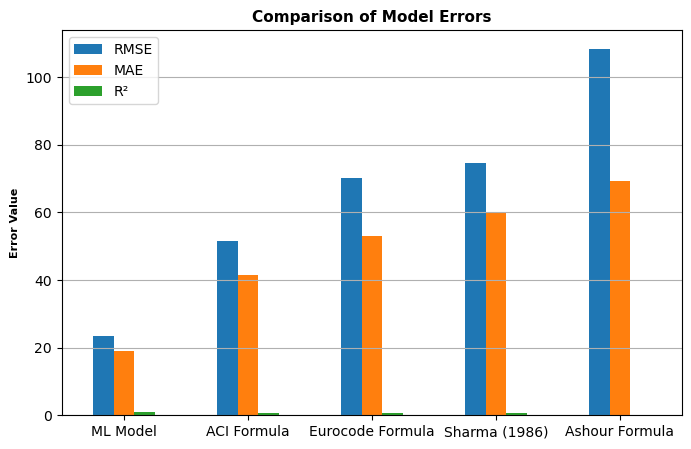

In [10]:
error_metrics = ["RMSE", "MAE", "R²"]
models = ["ML Model", "ACI Formula", "Eurocode Formula", "Sharma (1986)", "Ashour Formula"]
error_values = [ml_errors, aci_errors, eurocode_errors, sharma_errors, ashour_errors]

df_errors = pd.DataFrame(error_values, index=models, columns=error_metrics)

df_errors.plot(kind="bar", figsize=(8, 5))
plt.title("Comparison of Model Errors", fontsize=11, fontweight="bold")
plt.ylabel("Error Value", fontsize=8, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()
